In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from IPython.display import HTML

In [2]:
data=load_boston()

In [3]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
max(data)

'target'

In [5]:
min(data)

'DESCR'

In [6]:
min(data)

'DESCR'

In [7]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
features=pd.DataFrame(data.data,columns=data.feature_names)

In [9]:
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
features["AGE"]

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [11]:
target=pd.DataFrame(data.target,columns=["target"])

In [12]:
target

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


                     CREATING SINGLE TABLE HAVING FEATURES AND TARGET VALUE

In [13]:
df=pd.concat([features,target],axis=1)

In [14]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [15]:
#use round (decimals=2) to set the precision to 2 decimal point
df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


                    CORRELATION(FINDING THE HIGHEST CORRELATED ATTRIBUTE WITH TARGET)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

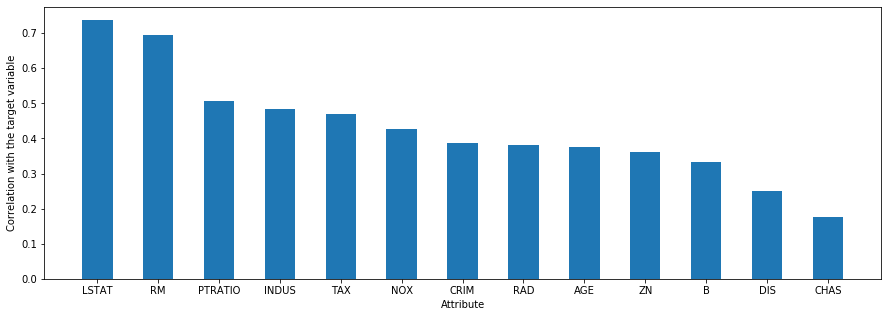

In [16]:
#calculate correlation between every column on the data
corr=df.corr('pearson')
print(corr)
#take absolute value of correlations
corrs=[abs(corr[attr]["target"]) for attr in list(features)]
print(corrs)
#make a list of pairs [(corr,feature)]
l=list(zip(corrs,list(features)))
print(l)
#sort the list of pairs in reverse/descending order
#with the correlation value as the key of sorting
l.sort(reverse=True)
#"unzip" pairs of two lists
#zip(*l)-takes a list that looks like [[a,b,c]],[d,e,f],[g,h,i]]
#and returns [[a,d,g],[b,e,h],[c,f,i]]
corrs,features=list(zip((*l)))
#print(corrs)
#print(features)
#plot correlations with respect to the target variable as a bar graph
#index=np.arange(len(features))
##print(index)
plt.figure(figsize=(15,5))
plt.bar(features,corrs,width=0.5)
plt.xlabel("Attribute")
plt.ylabel("Correlation with the target variable")
#plt.xticks(index,features)
plt.show()

In [17]:
import seaborn as sn

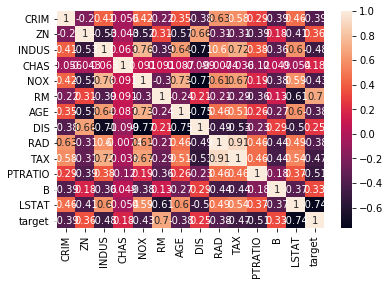

In [18]:
sn.heatmap(corr,annot=True)
plt.show()

                                         NORMALIZATION

In [19]:
###NORMALIZATION 

X=df["LSTAT"].values
Y=df["target"].values

In [20]:
Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [21]:
#before normalization
print(Y[:5])

[24.  21.6 34.7 33.4 36.2]


In [22]:
X.reshape(-1,1)

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [23]:
x_scalar=MinMaxScaler()
X=x_scalar.fit_transform(X.reshape(-1,1))
X=X[:,-1]
y_scalar=MinMaxScaler()
Y=y_scalar.fit_transform(Y.reshape(-1,1))
Y=Y[:,-1]

In [24]:
#after normalization
print(Y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


In [25]:
def error(m,x,c,t):
    N=x.size
    e=sum(((m*x+c)-t)**2)
    return e*1/(2*N)



SPLITTING THE DATA

In [26]:
#0.2 indicates 20% of the data is randomly sampled as testing data
xtrain,xtest,ytrain,ytest=train_test_split(X, Y, test_size=0.2)

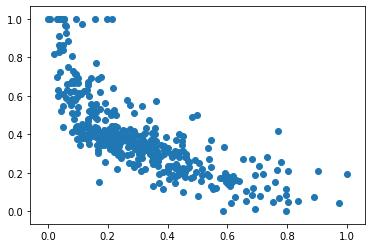

In [27]:
plt.scatter(xtrain,ytrain)
plt.show()

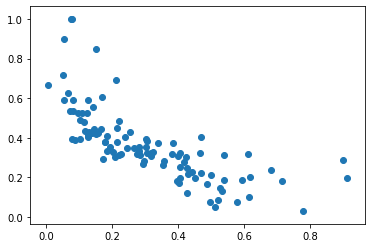

In [28]:
plt.scatter(xtest,ytest)
plt.show()

In [29]:
#UPDATING WEIGHTS:
#m:slope
#x:independent varibale value
#t:target value
#c:line intercept
#x and t are are numpy araray that is these are the  columns of independent varibale and taregt value of the tarining dataset

def update(m,x,c,t,learning_rate):
    grad_m=sum(2*((m*x+c)-t)*x)*learning_rate
    grad_c=sum(2*((m*x+c)-t))*learning_rate
    m=m-grad_m
    c=c-grad_c
    return m,c


                        GRADIENT DESCENT FUNCTION TO MINIMAMIZE LOSS FUNCTION

In [30]:
def gradient_descent(init_m,init_c,x,t,learning_rate,iterations,error_threshold):
    m=init_m
    c=init_c
    error_values=list()
    mc_values=list()
    for i in range (iterations):
        e=error(m,x,c,t)
        if e<error_threshold:
            print("Error less than threshold stopping gradient decent")
            break
        error_values.append(e)
        m,c=update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m,c,error_values,mc_values

defining gradient descent function

init_m:initial estimate of slope m for the linear regression line

init_c:initial estimate of intercept c

x:x is the numpy araray of the values of the independent variable

t:numpy array of the value of the target value

learning_rate:learning rate of the algorithm

error_threshold: error with threshold after the training gete ends

iterations: no of iterations

if the the error falls through below the threshold the gradient decent process is stoped and the weights are returned

In [31]:
%%time
#it is called magic function it gives us execution time
init_m=0.9
init_c=0
learning_rate=0.001
iterations=250
error_threshold=0.001



m, c, error_values, mc_values = gradient_descent(init_m, init_c, xtrain, ytrain, learning_rate, iterations, error_threshold)

Wall time: 266 ms


                                        VISUALIZATION  IN TRAINING PHASE

In [32]:
#as the number of iteration increases,changes in the line are less noticable,
#inorder to reduce the processsing time for the animation ,it is adviced to choose small value
mc_values_anim=mc_values[0:250:5]

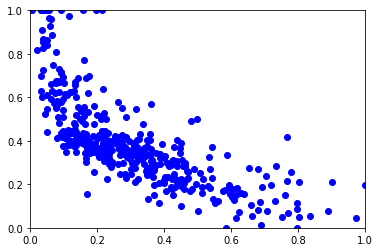

In [33]:
##visualization of training phase:

fig,ax=plt.subplots()
ln,=plt.plot([],[],'ro-',animated=True)
def init():
    plt.scatter(xtrain,ytrain,color="b")
    ax.set_xlim(0,1.0)
    ax.set_ylim(0,1.0)
    return ln,
def update_frame(frame):
    m,c=mc_values_anim[frame]
    x1,y1=-0.5,m*-.5+c
    x2,y2=1.5,m*1.5+c
    ln.setdata([x1,x2],[y1,y2])
    return ln,
anim=FuncAnimation(fig,update_frame,frames=range(len(mc_values_anim)),init_func=init,blit=True)



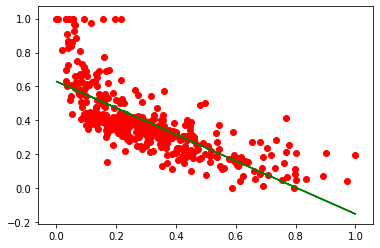

In [34]:
##plotting regression line on training data set
plt.scatter(xtrain,ytrain,color="r")
plt.plot(xtrain,(m*xtrain+c),color="g")

Text(0.5, 0, 'iterations')

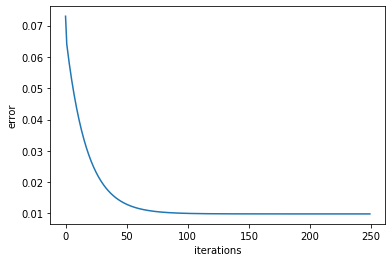

In [35]:
#plotting error values 
plt.plot(np.arange(len(error_values)),error_values)
plt.ylabel('error')
plt.xlabel("iterations")

We can see that error value decresing with each iteration and we can also see that after a no of iterations graph become parallel so there is no effect after a certain point.

In [36]:
#calculate the prediction on test set as a vectorized operation
predicted=(m*xtest)+c

In [37]:
#calculate mse for the predicted value on the testing set
mean_squared_error(ytest,predicted)

0.016489797336822844

In [38]:
#put xtest and ytest and predicted value into a single datasetset
#can see the predicted values along the testing dataset
p=pd.DataFrame(list(zip(xtest,ytest,predicted)),columns=['x','target_y','predicted_y'])
p.head()

,x,target_y,predicted_y
0,0.127759,0.415556,0.530042
1,0.318709,0.324444,0.381006
2,0.403422,0.171111,0.314887
3,0.157285,0.424444,0.506997
4,0.083057,0.533333,0.564931


                        VISUALIZATION OF TESTING PHASE
                      REGRESSION LINE ON TESTING DATA SET
                      PLOT THE PREDICTE VALUE AGAINST TAREGT VALUE 

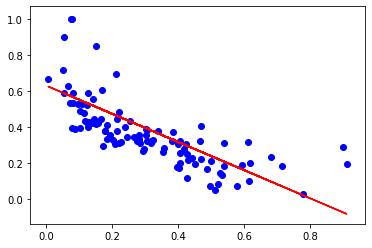

In [39]:
plt.scatter(xtest,ytest,color="b")
plt.plot(xtest,predicted,color='r')

In [40]:
#reshape to change the shape that is required by the scalar
xtest_scaled=x_scalar.inverse_transform(xtest.reshape(-1,1))
ytest_scaled=y_scalar.inverse_transform(ytest.reshape(-1,1))
predicted_scaled=y_scalar.inverse_transform(predicted.reshape(-1,1))
#this is to remove the extra dimension
xtest_scaled=xtest_scaled[:,-1]
ytest_scaled=ytest_scaled[:,-1]
predicted_scaled=predicted_scaled[:,-1]

p=pd.DataFrame(list(zip(xtest_scaled,ytest_scaled,predicted_scaled)),columns=['x','target_y','predicted_y'])
p=p.round(decimals=2)
p.head()

,x,target_y,predicted_y
0,6.36,23.7,28.85
1,13.28,19.6,22.15
2,16.35,12.7,19.17
3,7.43,24.1,27.81
4,4.74,29.0,30.42
